## Preprocessing

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('train.csv')

In [5]:
df

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,0,L50096,L,300.6,309.6,1596,36.1,140,0,0,0,0,0,0
1,1,M20343,M,302.6,312.1,1759,29.1,200,0,0,0,0,0,0
2,2,L49454,L,299.3,308.5,1805,26.5,25,0,0,0,0,0,0
3,3,L53355,L,301.0,310.9,1524,44.3,197,0,0,0,0,0,0
4,4,M24050,M,298.0,309.0,1641,35.4,34,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136424,136424,M22284,M,300.1,311.4,1530,37.5,210,0,0,0,0,0,0
136425,136425,H38017,H,297.5,308.5,1447,49.1,2,0,0,0,0,0,0
136426,136426,L54690,L,300.5,311.8,1524,38.5,214,0,0,0,0,0,0
136427,136427,L53876,L,301.7,310.9,1447,46.3,42,0,0,0,0,0,0


In [6]:
df.drop(['id','Product ID'],axis=1,inplace=True)

In [7]:
target_col = 'Machine failure'

num_cols = [
    'Air temperature [K]',
    'Process temperature [K]',
    'Rotational speed [rpm]',
    'Torque [Nm]',
    'Tool wear [min]'
]

binary_cols = [
    'TWF',
    'HDF',
    'PWF',
    'OSF',
    'RNF'
]


In [8]:
filtered_df = df[(df[target_col] == 1) & (df[binary_cols].sum(axis=1) == 0)]

d_columns = binary_cols + [target_col]
filtered_df = filtered_df[d_columns]

filtered_df

,TWF,HDF,PWF,OSF,RNF,Machine failure
130,0,0,0,0,0,1
228,0,0,0,0,0,1
888,0,0,0,0,0,1
1518,0,0,0,0,0,1
1806,0,0,0,0,0,1
...,...,...,...,...,...,...
134865,0,0,0,0,0,1
134955,0,0,0,0,0,1
135097,0,0,0,0,0,1
135570,0,0,0,0,0,1


In [9]:
one_hot_type = pd.get_dummies(df["Type"])

In [10]:
df.drop(['Type'],axis=1,inplace=True)

In [11]:
df = pd.concat([df,one_hot_type],axis=1)

In [12]:
df

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF,H,L,M
0,300.6,309.6,1596,36.1,140,0,0,0,0,0,0,False,True,False
1,302.6,312.1,1759,29.1,200,0,0,0,0,0,0,False,False,True
2,299.3,308.5,1805,26.5,25,0,0,0,0,0,0,False,True,False
3,301.0,310.9,1524,44.3,197,0,0,0,0,0,0,False,True,False
4,298.0,309.0,1641,35.4,34,0,0,0,0,0,0,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136424,300.1,311.4,1530,37.5,210,0,0,0,0,0,0,False,False,True
136425,297.5,308.5,1447,49.1,2,0,0,0,0,0,0,True,False,False
136426,300.5,311.8,1524,38.5,214,0,0,0,0,0,0,False,True,False
136427,301.7,310.9,1447,46.3,42,0,0,0,0,0,0,False,True,False


<Axes: ylabel='count'>

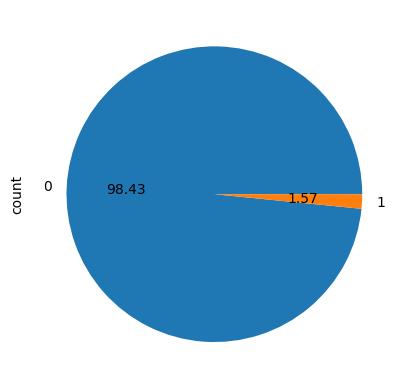

In [13]:
df[target_col].value_counts().plot(kind='pie',autopct='%.2f')

In [14]:
df.drop_duplicates(keep='first',inplace=True)

In [15]:
df.shape

(135273, 14)

In [16]:
#Temp Difference
df['Temp Difference'] = df['Process temperature [K]'] - df['Air temperature [K]']
#Power Factor
df['Power Factor'] = df['Rotational speed [rpm]'] * df['Torque [Nm]']
#Temp Ratio 
df["Temp Ratio"] = df["Process temperature [K]"]/df["Air temperature [K]"]

In [17]:
df

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF,H,L,M,Temp Difference,Power Factor,Temp Ratio
0,300.6,309.6,1596,36.1,140,0,0,0,0,0,0,False,True,False,9.0,57615.6,1.029940
1,302.6,312.1,1759,29.1,200,0,0,0,0,0,0,False,False,True,9.5,51186.9,1.031395
2,299.3,308.5,1805,26.5,25,0,0,0,0,0,0,False,True,False,9.2,47832.5,1.030738
3,301.0,310.9,1524,44.3,197,0,0,0,0,0,0,False,True,False,9.9,67513.2,1.032890
4,298.0,309.0,1641,35.4,34,0,0,0,0,0,0,False,False,True,11.0,58091.4,1.036913
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136424,300.1,311.4,1530,37.5,210,0,0,0,0,0,0,False,False,True,11.3,57375.0,1.037654
136425,297.5,308.5,1447,49.1,2,0,0,0,0,0,0,True,False,False,11.0,71047.7,1.036975
136426,300.5,311.8,1524,38.5,214,0,0,0,0,0,0,False,True,False,11.3,58674.0,1.037604
136427,301.7,310.9,1447,46.3,42,0,0,0,0,0,0,False,True,False,9.2,66996.1,1.030494


In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
columns_to_standardize = num_cols + ['Temp Difference','Power Factor','Temp Ratio']
st = StandardScaler()

df[columns_to_standardize] = st.fit_transform(df[columns_to_standardize]) 

In [20]:
df

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF,H,L,M,Temp Difference,Power Factor,Temp Ratio
0,0.395546,-0.246363,0.545666,-0.499439,0.557371,0,0,0,0,0,0,False,True,False,-1.093499,-0.294011,-1.074094
1,1.469284,1.558786,1.721283,-1.323638,1.495664,0,0,0,0,0,0,False,False,True,-0.586292,-0.968932,-0.650003
2,-0.302383,-1.040629,2.053052,-1.629769,-1.241024,0,0,0,0,0,0,False,True,False,-0.890616,-1.321095,-0.841335
3,0.610294,0.692315,0.026375,0.466051,1.448750,0,0,0,0,0,0,False,True,False,-0.180526,0.745093,-0.213862
4,-1.000313,-0.679599,0.870222,-0.581859,-1.100280,0,0,0,0,0,0,False,False,True,0.935331,-0.244059,0.958984
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136424,0.127112,1.053344,0.069649,-0.334599,1.652046,0,0,0,0,0,0,False,False,True,1.239655,-0.319271,1.175151
136425,-1.268747,-1.040629,-0.528978,1.031216,-1.600703,0,0,0,0,0,0,True,False,False,0.935331,1.116165,0.977073
136426,0.341860,1.342168,0.026375,-0.216856,1.714599,0,0,0,0,0,0,False,True,False,1.239655,-0.182895,1.160536
136427,0.986102,0.692315,-0.528978,0.701537,-0.975174,0,0,0,0,0,0,False,True,False,-0.890616,0.690805,-0.912633


In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X = df.drop([target_col],axis=1)
y = df[target_col]

In [23]:
train_X,test_X,train_y,test_y = train_test_split(X,y,stratify=y,test_size=0.3)
test_y_g = test_y

In [24]:
train_X.shape,test_X.shape

((94691, 16), (40582, 16))

## AdaBoost

## Normal

In [25]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics

In [26]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics

# Create AdaBoost classifier 
clf = AdaBoostClassifier(n_estimators=50, random_state=42)

In [27]:
# Train AdaBoost Classifier
clf = clf.fit(train_X, train_y)

# Predict the response for test dataset
y_pred = clf.predict(test_X)

In [28]:
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score, confusion_matrix  

In [29]:
print("Accuracy:", accuracy_score(y_pred, test_y))
print("Precision:", precision_score(y_pred, test_y))
print("Recall:", recall_score(y_pred, test_y))
print("F1:", f1_score(y_pred, test_y))


# You can access the individual weak classifiers (base learners) in the AdaBoost model
weak_learners = clf.estimators_

# The number of weak classifiers used (n_estimators)
num_weak_classifiers = clf.n_estimators
print("Number of weak classifiers:", num_weak_classifiers)


Accuracy: 0.9962791385343256
Precision: 0.7652582159624414
Recall: 0.9979591836734694
F1: 0.8662533215234721
Number of weak classifiers: 50


## Cross Validation before Hyper Parameter Tuning

In [30]:
from sklearn.model_selection import cross_val_score

In [31]:
from sklearn.model_selection import KFold

In [32]:
kf = KFold(n_splits=5, shuffle=False)

In [33]:
from statistics import stdev
score = cross_val_score(clf, train_X, train_y, cv=kf, scoring='recall')
clf_cv_score = score.mean()
clf_cv_stdev = stdev(score)
print('Cross Validation Recall scores are: {}'.format(score))
print('Average Cross Validation Recall score: ', clf_cv_score)
print('Cross Validation Recall standard deviation: ', clf_cv_stdev)

Cross Validation Recall scores are: [0.75420875 0.73333333 0.7266881  0.80756014 0.78350515]
Average Cross Validation Recall score:  0.7610590965064397
Cross Validation Recall standard deviation:  0.034143750051175245


## Hyper Parameter Tuning

In [57]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV

model = AdaBoostClassifier(random_state=42)

grid = dict()
grid['n_estimators'] = [10,20, 40, 100]
grid['learning_rate'] = [0.0001, 0.01, 0.1]

cv = KFold(n_splits=5, shuffle=False)
grid_search = GridSearchCV(estimator=model, param_grid=grid, cv=cv, scoring='recall')
grid_result = grid_search.fit(train_X, train_y)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.834884 using {'learning_rate': 0.1, 'n_estimators': 100}


In [58]:
 best_clf_classifier = grid_search.best_estimator_

best_clf_classifier.fit(train_X, train_y)
y_pred_g = best_clf_classifier.predict(test_X)

## Cross Validation After Hyper Parameter Tuning

In [36]:
score = cross_val_score(best_clf_classifier, train_X, train_y, cv=kf, scoring='recall')
clf_cv_score = score.mean()
clf_cv_stdev = stdev(score)
print('Cross Validation Recall scores are: {}'.format(score))
print('Average Cross Validation Recall score: ', clf_cv_score)
print('Cross Validation Recall standard deviation: ', clf_cv_stdev)

Cross Validation Recall scores are: [0.75084175 0.73666667 0.7170418  0.79725086 0.76975945]
Average Cross Validation Recall score:  0.754312105485971
Cross Validation Recall standard deviation:  0.030801126261447237


## Testing

In [37]:
y_pred_new = best_clf_classifier.predict(test_X)

In [38]:
print("Accuracy:",accuracy_score(y_pred_new,test_y))
print("Precision:",precision_score(y_pred_new,test_y))
print("Recall:",recall_score(y_pred_new,test_y))
print("F1:",f1_score(y_pred_new,test_y))
confusion = confusion_matrix(y_pred, test_y)
print("confusion-matrix", confusion)

Accuracy: 0.9959095165344242
Precision: 0.7417840375586855
Recall: 0.9978947368421053
F1: 0.850987432675045
confusion-matrix [[39942   150]
 [    1   489]]


## Over Sampling

In [39]:
from imblearn.over_sampling import SMOTE

In [40]:
X_ = X
y_ = y
smote = SMOTE(sampling_strategy='auto', random_state=42)
Xo, yo = smote.fit_resample(X_, y_)
yo.value_counts()

Machine failure
0    133144
1    133144
Name: count, dtype: int64

In [41]:
Xo.to_csv('smotex.csv')
yo.to_csv('smotey.csv')

In [42]:
train_X,test_X,train_y,test_y = train_test_split(Xo,yo,stratify=yo,test_size=0.3)

In [43]:
o_clf = AdaBoostClassifier()

o_clf = clf.fit(train_X,train_y)

In [44]:
#Predict the response for test dataset
y_pred_o = o_clf.predict(test_X)

In [45]:
print("Accuracy:",accuracy_score(y_pred_o,test_y))
print("Precision:",precision_score(y_pred_o,test_y))
print("Recall:",recall_score(y_pred_o,test_y))
print("F1:",f1_score(y_pred_o,test_y))

Accuracy: 0.8978682388874285
Precision: 0.838770247602834
Recall: 0.9511952756799728
F1: 0.8914521386283509


## Under Sampling

In [46]:
con = pd.concat([X,y],axis=1)
con

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF,H,L,M,Temp Difference,Power Factor,Temp Ratio,Machine failure
0,0.395546,-0.246363,0.545666,-0.499439,0.557371,0,0,0,0,0,False,True,False,-1.093499,-0.294011,-1.074094,0
1,1.469284,1.558786,1.721283,-1.323638,1.495664,0,0,0,0,0,False,False,True,-0.586292,-0.968932,-0.650003,0
2,-0.302383,-1.040629,2.053052,-1.629769,-1.241024,0,0,0,0,0,False,True,False,-0.890616,-1.321095,-0.841335,0
3,0.610294,0.692315,0.026375,0.466051,1.448750,0,0,0,0,0,False,True,False,-0.180526,0.745093,-0.213862,0
4,-1.000313,-0.679599,0.870222,-0.581859,-1.100280,0,0,0,0,0,False,False,True,0.935331,-0.244059,0.958984,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136424,0.127112,1.053344,0.069649,-0.334599,1.652046,0,0,0,0,0,False,False,True,1.239655,-0.319271,1.175151,0
136425,-1.268747,-1.040629,-0.528978,1.031216,-1.600703,0,0,0,0,0,True,False,False,0.935331,1.116165,0.977073,0
136426,0.341860,1.342168,0.026375,-0.216856,1.714599,0,0,0,0,0,False,True,False,1.239655,-0.182895,1.160536,0
136427,0.986102,0.692315,-0.528978,0.701537,-0.975174,0,0,0,0,0,False,True,False,-0.890616,0.690805,-0.912633,0


In [47]:
false_values = con[con['Machine failure'] == 0].sample(n=3000, random_state=42)
# Filter all true values
true_values = con[con['Machine failure'] == 1]

# Combine the two subsets to create the new dataset
con = pd.concat([false_values, true_values])

# Shuffle the new dataset to ensure random order
con = con.sample(frac=1, random_state=42)
con.count()


Air temperature [K]        5129
Process temperature [K]    5129
Rotational speed [rpm]     5129
Torque [Nm]                5129
Tool wear [min]            5129
TWF                        5129
HDF                        5129
PWF                        5129
OSF                        5129
RNF                        5129
H                          5129
L                          5129
M                          5129
Temp Difference            5129
Power Factor               5129
Temp Ratio                 5129
Machine failure            5129
dtype: int64

In [48]:
u_y = con['Machine failure']
u_x = con.drop(['Machine failure'],axis=1)
u_x

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF,H,L,M,Temp Difference,Power Factor,Temp Ratio
68148,0.717668,0.547903,-0.911234,2.243966,0.963965,0,0,1,0,0,False,True,False,-0.586292,2.350364,-0.607455
12348,-1.107687,-1.329453,9.763081,-4.184785,0.400989,0,0,1,0,0,False,True,False,0.225240,-4.894519,0.280833
15286,-0.141322,0.114667,2.031415,-1.676866,-0.099434,0,0,0,0,0,False,True,False,0.428123,-1.405115,0.414890
84380,-1.000313,-1.762689,-1.019420,2.938648,-1.147194,0,0,0,1,0,False,True,False,-0.586292,3.110994,-0.508699
11352,0.878729,0.475697,-1.336764,1.419767,-1.115918,0,0,0,1,0,True,False,False,-0.992058,1.001342,-1.003444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92626,1.308224,1.342168,-0.492916,1.867189,1.620770,0,0,0,1,0,False,True,False,-0.586292,2.224255,-0.640919
83990,-1.215060,-0.390775,-0.233271,0.548471,1.980449,0,0,0,0,0,False,True,False,1.746863,0.687015,1.757267
6935,1.147163,0.620109,-0.182784,-0.157985,2.043002,1,0,0,0,0,False,True,False,-1.296382,-0.221634,-1.307663
50387,1.898780,1.053344,-1.055482,0.807505,1.996087,0,1,0,0,0,False,True,False,-2.107915,0.465790,-2.115701


In [49]:
u_clf = AdaBoostClassifier()

In [50]:
train_X,test_X,train_y,test_y = train_test_split(u_x,u_y,stratify=u_y,test_size=0.3)

In [51]:
u_clf = clf.fit(train_X,train_y)

In [52]:
y_pred_u = u_clf.predict(test_X)

In [53]:
print("Accuracy:",accuracy_score(y_pred_u,test_y))
print("Precision:",precision_score(y_pred_u,test_y))
print("Recall:",recall_score(y_pred_u,test_y))
print("F1:",f1_score(y_pred_u,test_y))

Accuracy: 0.916829109811566
Precision: 0.838810641627543
Recall: 0.9554367201426025
F1: 0.8933333333333333


## ROC Curve

In [54]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

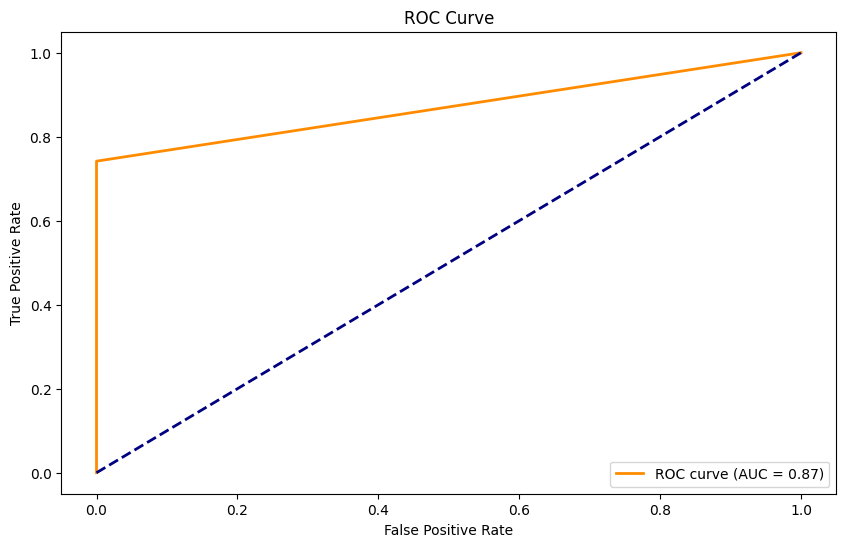

In [55]:
fpr, tpr, _ = roc_curve(test_y_g, y_pred_g)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

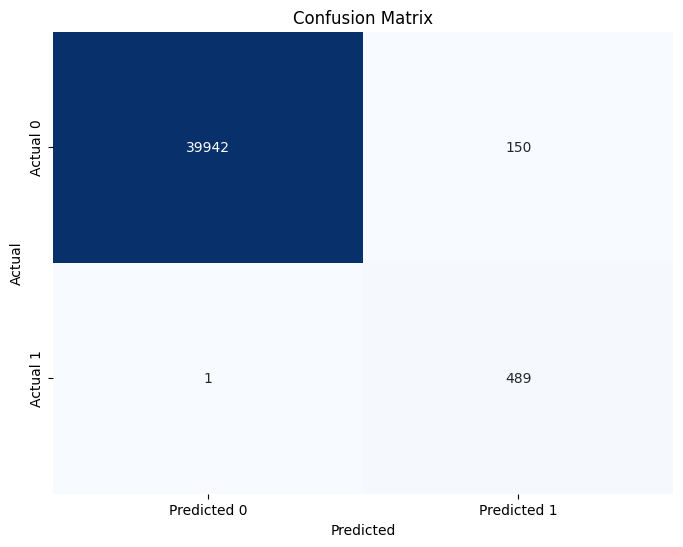

In [56]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False,
xticklabels=['Predicted 0', 'Predicted 1'],
yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()